In [1]:
#with constant
logit2 = sm.Logit(endog=y_train, exog=sm.add_constant(X_train))
logit2.fit().params
# fit the model
result2 = logit2.fit()
#Interpreting the results
result2.summary()
result2.summary2() #what is the value of AIC - 59.81 here
result2.conf_int()
result2.pred_table(threshold=.5)
X_train.shape
X_test.shape
#predict test data
result2.predict(sm.add_constant(X_test))
#new data
result2.predict(sm.add_constant(newdata)) #.9 ~ 1; #.00 ~ 0
logModel.predict_proba(newdata)
logModel.predict(newdata)
#Logistic Regression is the base of all classification algorithms.
#A good understanding on logistic regression and goodness of fit measures will
really help in understanding complex machine learning algorithms like neural
networks and SVMs.
#One has to be careful while selecting the model, all the goodness of fit
measures are calculated on training data. We may have to do cross validation to
get an idea on the test error.
#Mention 2 applications of Logistic Regression (domain and what can we predict)
#end here

SyntaxError: invalid syntax (<ipython-input-1-71669b3c5016>, line 21)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:

from sklearn.datasets import load_wine
wine = load_wine()
wine
wine.data


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
# feature matrix
X = wine.data
X
# target vector
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
labels = wine.feature_names
labels


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
#join X & y to dataframe
df = pd.DataFrame(wine.data)
#name the columns
df.columns = ['Alcohol', 'Malicacid', 'Ash', 'AlcalinityOfAsh', 'Magnesium',
'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins',
'ColorIntensity', 'Hue', 'OD280_OD315', 'Proline']
df


,Alcohol,Malicacid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
df['target'] = pd.Series(wine.target) #add class column as target
df


,Alcohol,Malicacid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280_OD315,Proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df.shape

(178, 14)

In [9]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [10]:
data = df[df.target != 2]
data.target.value_counts()

1    71
0    59
Name: target, dtype: int64

In [11]:
#use only 3 columns for constructing a model
data2 = data[['Alcohol', 'Magnesium', 'Proline', 'target']]
data2.head()

,Alcohol,Magnesium,Proline,target
0,14.23,127.0,1065.0,0
1,13.20,100.0,1050.0,0
2,13.16,101.0,1185.0,0
3,14.37,113.0,1480.0,0
4,13.24,118.0,735.0,0


In [12]:
data2.describe()

,Alcohol,Magnesium,Proline,target
count,130.000000,130.000000,130.000000,130.000000
mean,12.944077,99.900000,790.092308,0.546154
std,0.888769,15.381379,352.513026,0.499791
min,11.030000,70.000000,278.000000,0.000000
25%,12.227500,88.000000,474.000000,0.000000
50%,13.010000,98.000000,716.000000,1.000000
75%,13.727500,108.000000,1063.750000,1.000000
max,14.830000,162.000000,1680.000000,1.000000


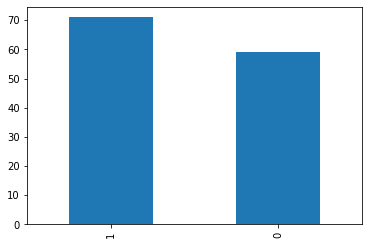

In [13]:
data2.target.value_counts().plot.bar()
plt.show();

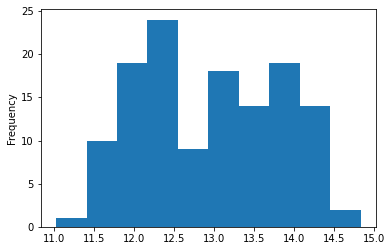

In [14]:
data2.Alcohol.plot.hist()
plt.show();

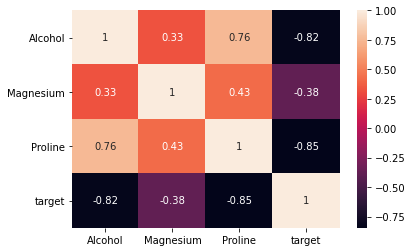

In [15]:
corr = data2.corr()
sns.heatmap(corr, annot=True)
plt.show();

In [16]:
data2.sample()

,Alcohol,Magnesium,Proline,target
53,13.77,115.0,1375.0,0


In [17]:
newdata = pd.DataFrame({'Alcohol':[12,13], 'Magnesium':[72,100], 'Proline':[300,
1000]})
newdata


,Alcohol,Magnesium,Proline
0,12,72,300
1,13,100,1000


In [18]:
data2.head()

,Alcohol,Magnesium,Proline,target
0,14.23,127.0,1065.0,0
1,13.20,100.0,1050.0,0
2,13.16,101.0,1185.0,0
3,14.37,113.0,1480.0,0
4,13.24,118.0,735.0,0


In [19]:
X = data2[['Alcohol', 'Magnesium', 'Proline']].values
X
y = data2['target'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
X

array([[  14.23,  127.  , 1065.  ],
       [  13.2 ,  100.  , 1050.  ],
       [  13.16,  101.  , 1185.  ],
       [  14.37,  113.  , 1480.  ],
       [  13.24,  118.  ,  735.  ],
       [  14.2 ,  112.  , 1450.  ],
       [  14.39,   96.  , 1290.  ],
       [  14.06,  121.  , 1295.  ],
       [  14.83,   97.  , 1045.  ],
       [  13.86,   98.  , 1045.  ],
       [  14.1 ,  105.  , 1510.  ],
       [  14.12,   95.  , 1280.  ],
       [  13.75,   89.  , 1320.  ],
       [  14.75,   91.  , 1150.  ],
       [  14.38,  102.  , 1547.  ],
       [  13.63,  112.  , 1310.  ],
       [  14.3 ,  120.  , 1280.  ],
       [  13.83,  115.  , 1130.  ],
       [  14.19,  108.  , 1680.  ],
       [  13.64,  116.  ,  845.  ],
       [  14.06,  126.  ,  780.  ],
       [  12.93,  102.  ,  770.  ],
       [  13.71,  101.  , 1035.  ],
       [  12.85,   95.  , 1015.  ],
       [  13.5 ,   96.  ,  845.  ],
       [  13.05,  124.  ,  830.  ],
       [  13.39,   93.  , 1195.  ],
       [  13.3 ,   94.  , 12

In [21]:
data2.columns


Index(['Alcohol', 'Magnesium', 'Proline', 'target'], dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)
X_train.shape, X_test.shape

((91, 3), (39, 3))

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
logModel = LogisticRegression(random_state=0)
logModel.fit(X_train, y_train)
logModel.classes_

array([0, 1])

In [24]:
logModel.intercept_

array([33.56617208])

In [25]:
logModel.coef_ 

array([[-2.07637108,  0.03385942, -0.01273012]])

In [26]:
X_test


array([[  12.22,   92.  ,  312.  ],
       [  12.42,   90.  ,  315.  ],
       [  13.48,  100.  ,  920.  ],
       [  11.87,   82.  ,  380.  ],
       [  13.77,  115.  , 1375.  ],
       [  12.21,  151.  ,  718.  ],
       [  12.29,   88.  ,  290.  ],
       [  14.38,  102.  , 1065.  ],
       [  13.74,  118.  , 1060.  ],
       [  11.56,  119.  ,  465.  ],
       [  13.58,  106.  , 1515.  ],
       [  13.88,  101.  , 1095.  ],
       [  11.84,  112.  ,  500.  ],
       [  11.64,   84.  ,  680.  ],
       [  12.52,   88.  ,  325.  ],
       [  13.05,   86.  ,  380.  ],
       [  13.83,  115.  , 1130.  ],
       [  13.72,  108.  , 1285.  ],
       [  13.24,  118.  ,  735.  ],
       [  12.37,   78.  ,  510.  ],
       [  13.56,  116.  , 1120.  ],
       [  13.05,  107.  ,  885.  ],
       [  13.83,   94.  , 1265.  ],
       [  13.76,  132.  , 1235.  ],
       [  13.05,   85.  ,  515.  ],
       [  12.42,  108.  ,  345.  ],
       [  12.08,   78.  ,  630.  ],
       [  13.75,   89.  , 13

In [27]:
logModel.predict_proba(X_test) #prob of 0 & 1 class


array([[6.51106664e-04, 9.99348893e-01],
       [1.09598812e-03, 9.98904012e-01],
       [9.39861414e-01, 6.01385863e-02],
       [1.04920462e-03, 9.98950795e-01],
       [9.99822354e-01, 1.77645534e-04],
       [1.49758755e-02, 9.85024124e-01],
       [6.51575949e-04, 9.99348424e-01],
       [9.98334501e-01, 1.66549898e-03],
       [9.88588819e-01, 1.14111810e-02],
       [4.64963643e-04, 9.99535036e-01],
       [9.99967296e-01, 3.27038816e-05],
       [9.96900905e-01, 3.09909523e-03],
       [1.64374638e-03, 9.98356254e-01],
       [2.69901906e-02, 9.73009809e-01],
       [1.63848212e-03, 9.98361518e-01],
       [1.05190466e-02, 9.89480953e-01],
       [9.96464099e-01, 3.53590075e-03],
       [9.99511181e-01, 4.88819125e-04],
       [3.28761835e-01, 6.71238165e-01],
       [1.74616205e-02, 9.82538380e-01],
       [9.92749905e-01, 7.25009500e-03],
       [7.63807924e-01, 2.36192076e-01],
       [9.99687583e-01, 3.12416982e-04],
       [9.98086588e-01, 1.91341241e-03],
       [5.778158

In [28]:
logModel.predict(X_test)


array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [29]:
y_predLG = logModel.predict(X_test)


In [30]:
logModel.score(X=X_train, y=y_train)


0.9560439560439561

In [31]:
logModel.score(X=X_test, y=y_test)


0.9743589743589743

In [32]:
cm=confusion_matrix(y_true= y_test, y_pred=y_predLG )


In [33]:
cm

array([[16,  1],
       [ 0, 22]])

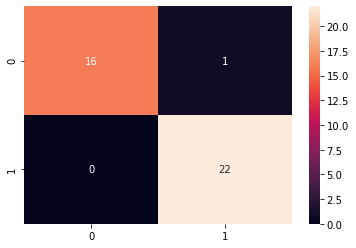

In [34]:
sns.heatmap(cm, annot=True)
plt.show();

In [35]:
classification_report(y_test, logModel.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97        17\n           1       0.96      1.00      0.98        22\n\n    accuracy                           0.97        39\n   macro avg       0.98      0.97      0.97        39\nweighted avg       0.98      0.97      0.97        39\n'

In [36]:
y_pred2B = logModel.predict(newdata)
y_pred2B
y_pred2C = logModel.predict_proba(newdata)
y_pred2C

array([[6.96629133e-04, 9.99303371e-01],
       [9.41079160e-01, 5.89208396e-02]])

In [37]:
y_pred2B

array([1, 0])

In [38]:
import statsmodels.api as sm
X_train = sm.add_constant(X)
X_train

array([[1.000e+00, 1.423e+01, 1.270e+02, 1.065e+03],
       [1.000e+00, 1.320e+01, 1.000e+02, 1.050e+03],
       [1.000e+00, 1.316e+01, 1.010e+02, 1.185e+03],
       [1.000e+00, 1.437e+01, 1.130e+02, 1.480e+03],
       [1.000e+00, 1.324e+01, 1.180e+02, 7.350e+02],
       [1.000e+00, 1.420e+01, 1.120e+02, 1.450e+03],
       [1.000e+00, 1.439e+01, 9.600e+01, 1.290e+03],
       [1.000e+00, 1.406e+01, 1.210e+02, 1.295e+03],
       [1.000e+00, 1.483e+01, 9.700e+01, 1.045e+03],
       [1.000e+00, 1.386e+01, 9.800e+01, 1.045e+03],
       [1.000e+00, 1.410e+01, 1.050e+02, 1.510e+03],
       [1.000e+00, 1.412e+01, 9.500e+01, 1.280e+03],
       [1.000e+00, 1.375e+01, 8.900e+01, 1.320e+03],
       [1.000e+00, 1.475e+01, 9.100e+01, 1.150e+03],
       [1.000e+00, 1.438e+01, 1.020e+02, 1.547e+03],
       [1.000e+00, 1.363e+01, 1.120e+02, 1.310e+03],
       [1.000e+00, 1.430e+01, 1.200e+02, 1.280e+03],
       [1.000e+00, 1.383e+01, 1.150e+02, 1.130e+03],
       [1.000e+00, 1.419e+01, 1.080e+02, 1.680

In [39]:
X_train.shape

(130, 4)

In [40]:
y_train.shape

(91,)

In [41]:
y_train = y_train.reshape(-1,1)

In [42]:
y_train.shape

(91, 1)